In [2]:
import yfinance as yf
from yahoo_fin.stock_info import get_data
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import plotly.graph_objects as go

import warnings

warnings.filterwarnings("ignore")

In [3]:
sns.set_theme()
sns.set_context("paper")

In [4]:
simbolo = "ES=F"

futuro = yf.Ticker(simbolo)
datos_historicos = futuro.history(start="2020-01-01", end="2024-03-09")
datos_historicos.index = pd.to_datetime(datos_historicos.index)
print(datos_historicos.tail())


                              Open     High      Low    Close   Volume  \
Date                                                                     
2024-03-04 00:00:00-05:00  5142.00  5157.75  5132.00  5138.25  1208040   
2024-03-05 00:00:00-05:00  5133.75  5135.50  5063.00  5085.75  1885769   
2024-03-06 00:00:00-05:00  5091.00  5134.50  5083.75  5111.75  1996223   
2024-03-07 00:00:00-05:00  5114.25  5170.50  5086.50  5161.75  1791666   
2024-03-08 00:00:00-05:00  5159.25  5193.00  5121.75  5129.00  2786680   

                           Dividends  Stock Splits  
Date                                                
2024-03-04 00:00:00-05:00        0.0           0.0  
2024-03-05 00:00:00-05:00        0.0           0.0  
2024-03-06 00:00:00-05:00        0.0           0.0  
2024-03-07 00:00:00-05:00        0.0           0.0  
2024-03-08 00:00:00-05:00        0.0           0.0  


In [30]:
datos_historicos.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03,1055.0,1055.0
mean,4013.208057,4045.985735,3979.187469,4015.197593,1.655404e+06,0.0,0.0
std,556.558927,549.931504,562.462394,555.610680,5.686609e+05,0.0,0.0
min,2220.250000,2386.000000,2174.000000,2220.500000,7.300900e+04,0.0,0.0
25%,3705.750000,3743.000000,3665.875000,3706.250000,1.302433e+06,0.0,0.0
50%,4122.750000,4157.750000,4091.500000,4123.000000,1.605196e+06,0.0,0.0
75%,4425.250000,4448.875000,4393.125000,4425.500000,1.925248e+06,0.0,0.0
max,5159.250000,5193.000000,5132.000000,5161.750000,5.715227e+06,0.0,0.0


In [57]:
datos_historicos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1055 entries, 2020-01-02 00:00:00-05:00 to 2024-03-08 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1055 non-null   float64
 1   High          1055 non-null   float64
 2   Low           1055 non-null   float64
 3   Close         1055 non-null   float64
 4   Volume        1055 non-null   int64  
 5   Dividends     1055 non-null   float64
 6   Stock Splits  1055 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 65.9 KB


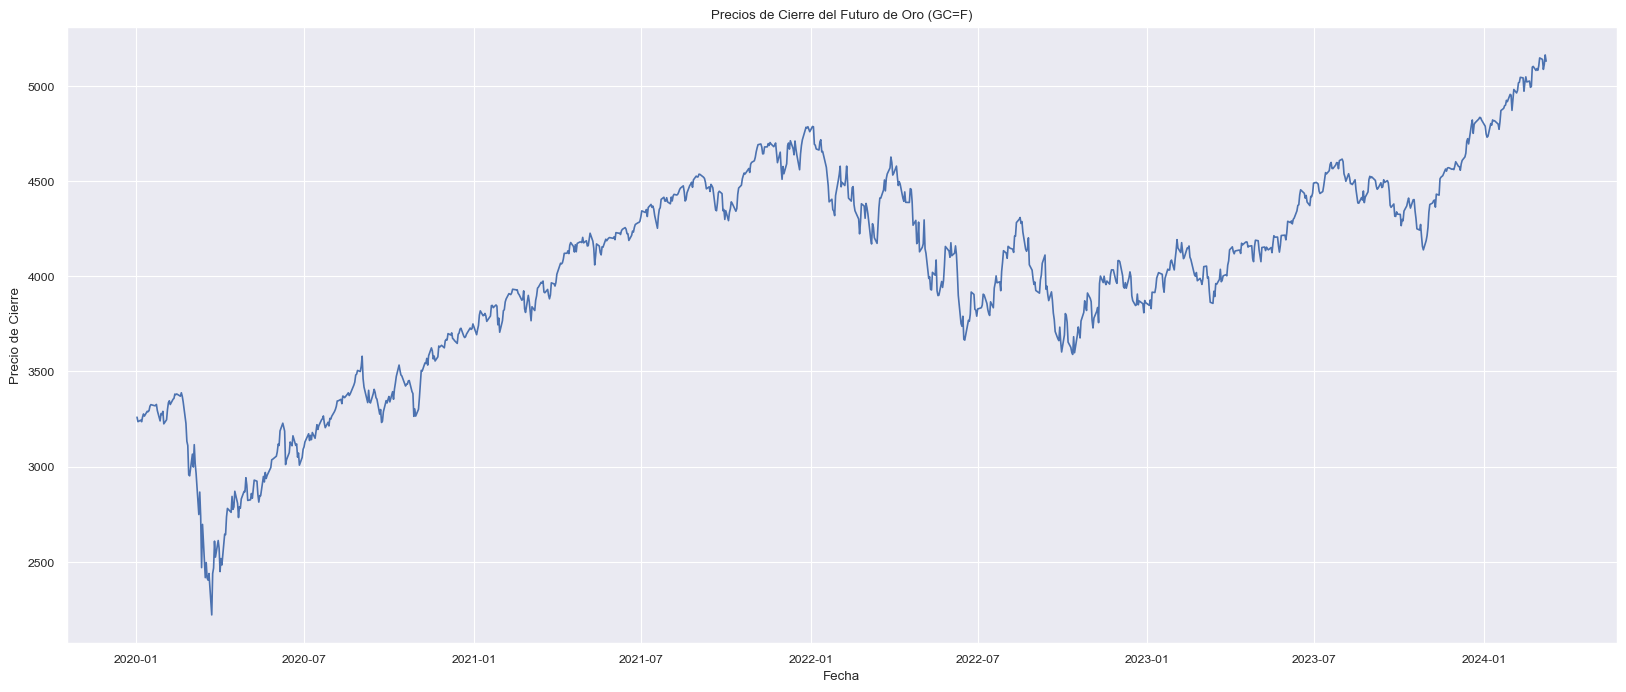

In [31]:
plt.figure(figsize=(20, 8))
plt.plot(datos_historicos.index, datos_historicos['Close'])
plt.title('Precios de Cierre del Futuro de Oro (GC=F)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.show()

In [32]:
fig = go.Figure(data=[go.Candlestick(x = datos_historicos.index,
                                     open = datos_historicos['Open'], 
                                     high = datos_historicos['High'],
                                     low = datos_historicos['Low'], 
                                     close = datos_historicos['Close'])
                     ])
fig.update_layout(
    title="S&P 500",
    xaxis_title="Day",
    yaxis_title="E-mini S&P 500",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig

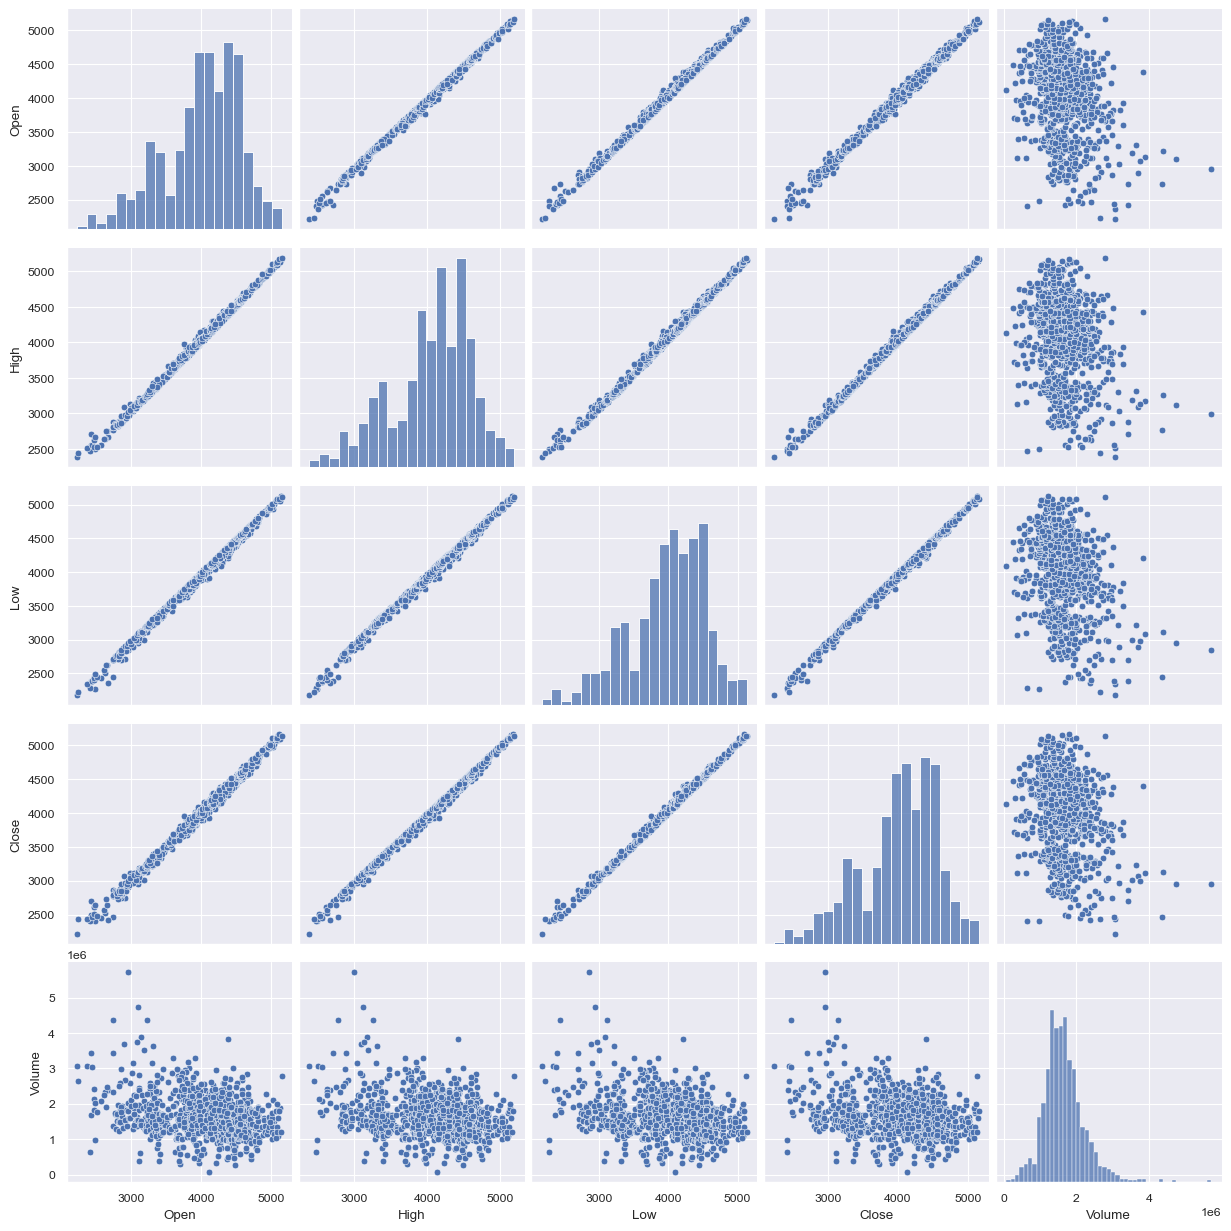

In [33]:
sns.pairplot(datos_historicos.drop(datos_historicos.columns[[5, 6]], axis=1)[1:])

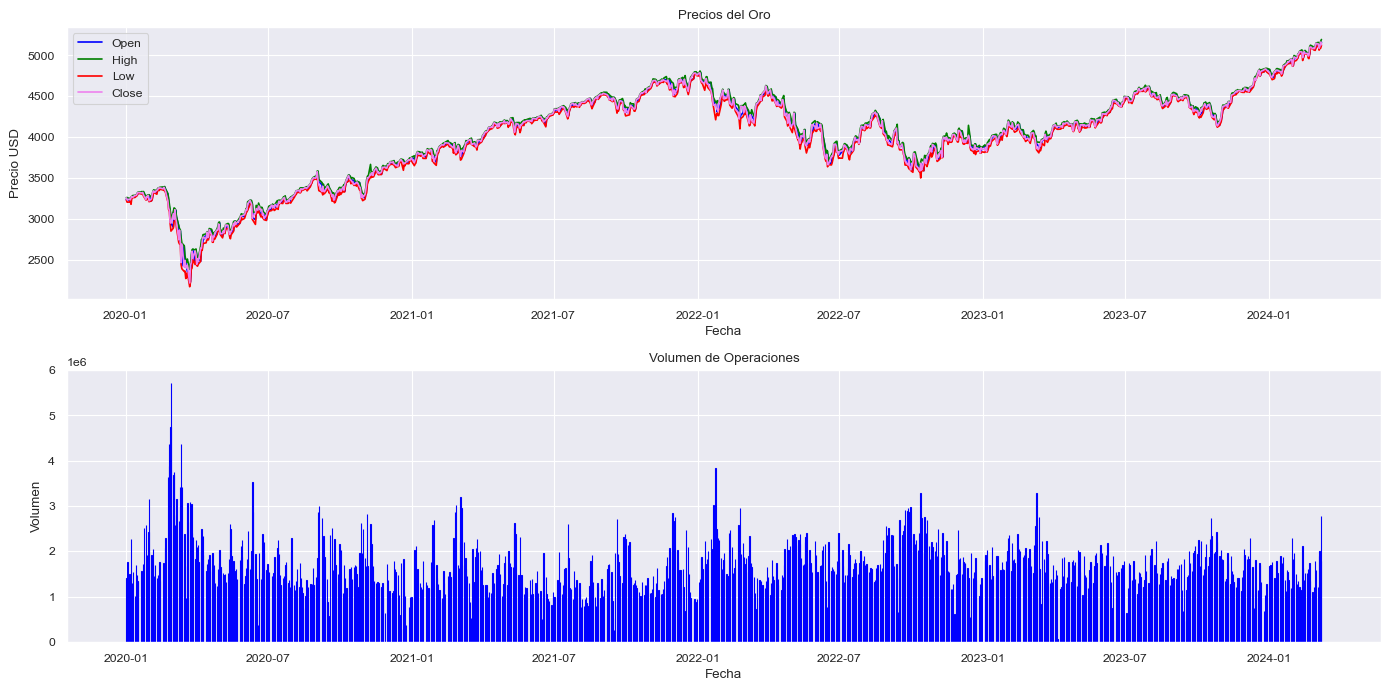

In [39]:
# Configuración de la figura para la visualización
plt.figure(figsize=(14, 7))

# Precios
plt.subplot(2, 1, 1)
plt.plot(datos_historicos.index, datos_historicos['Open'], label='Open', color='blue')
plt.plot(datos_historicos.index, datos_historicos['High'], label='High', color='green')
plt.plot(datos_historicos.index, datos_historicos['Low'], label='Low', color='red')
plt.plot(datos_historicos.index, datos_historicos['Close'], label='Close', color='violet')
plt.title('Precios del Oro')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend()

# Volumen
plt.subplot(2, 1, 2)
plt.bar(datos_historicos.index, datos_historicos['Volume'], edgecolor='blue', width=0.5)
plt.title('Volumen de Operaciones')
plt.xlabel('Fecha')
plt.ylabel('Volumen')

plt.tight_layout()
plt.show()

In [35]:
resultado = adfuller(datos_historicos['Close'])
print('Estadístico de prueba ADF: ', resultado[0])
print('Valor p: ', resultado[1])
print('Valores críticos:')
for key, valor in resultado[4].items():
    print(f'   {key}: {valor}')

Estadístico de prueba ADF:  -0.9983327072513138
Valor p:  0.7538719220496606
Valores críticos:
   1%: -3.4366231443991118
   5%: -2.864309749608104
   10%: -2.568244725395481


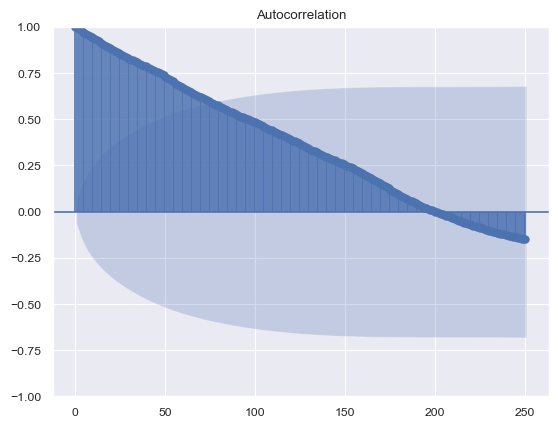

<Figure size 1200x800 with 0 Axes>

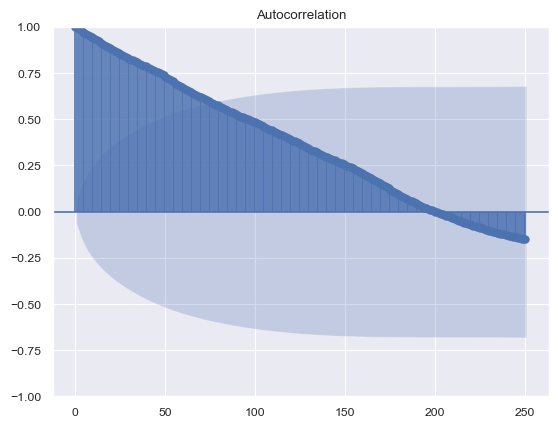

In [14]:
plt.figure(figsize=(12,8))
plot_acf(datos_historicos['Close'], lags=250)

In [46]:
datos_historicos['Retornos'] = datos_historicos['Close'].pct_change()

stat, p = shapiro(datos_historicos['Retornos'].dropna())
print(f'Prueba de Shapiro-Wilk, Estadístico={stat}, p-valor={p}')

Prueba de Shapiro-Wilk, Estadístico=0.881238579750061, p-valor=1.2349502878403249e-27


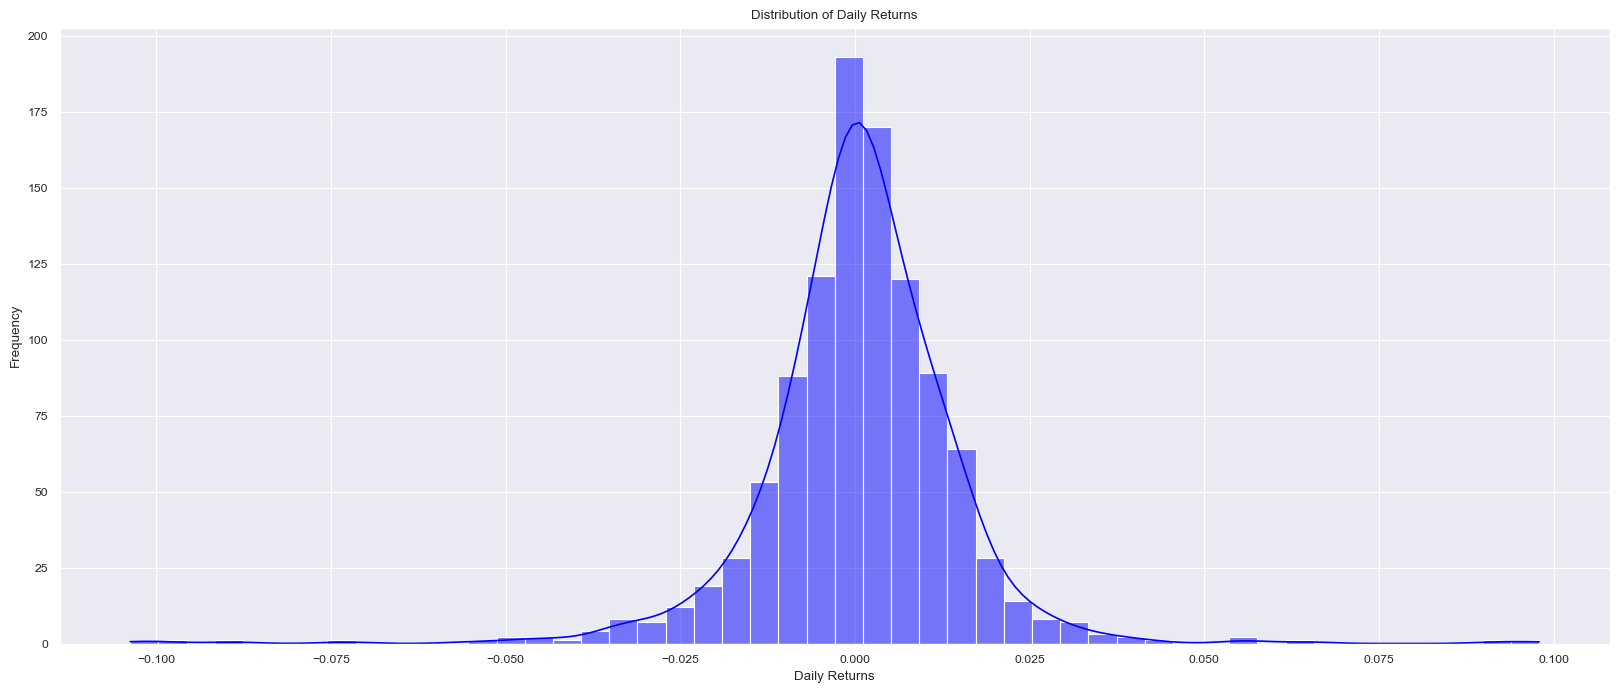

In [47]:
plt.figure(figsize=(20, 8))
sns.histplot(datos_historicos['Retornos'], kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

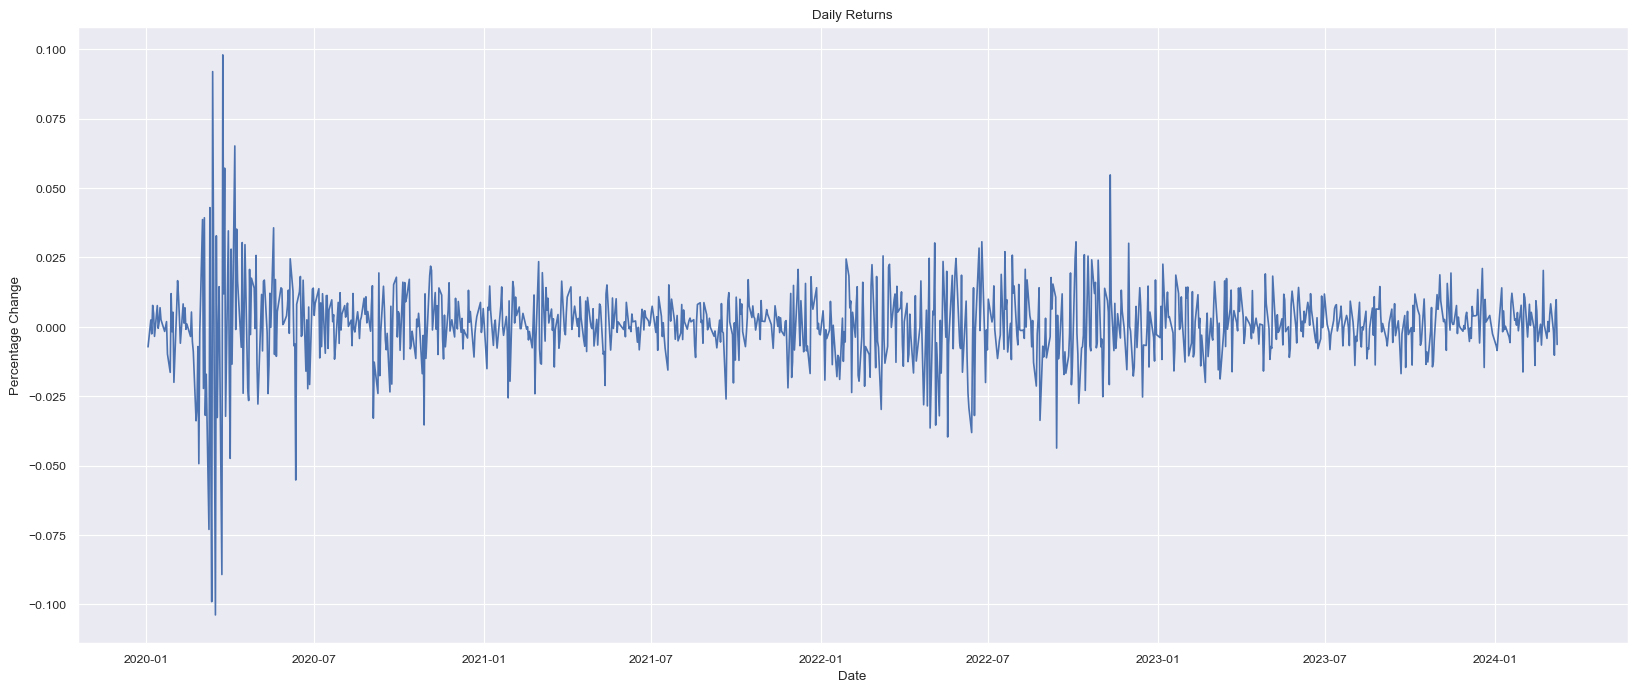

In [48]:
plt.figure(figsize=(20, 8))
plt.plot(datos_historicos['Retornos'])
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.show()